1. First, load the dataset from the weatherinszeged table from Thinkful's database.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

weather_df.head(5)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


2. Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity, windspeed, windbearing, and pressure*. Estimate the model using OLS.

In [2]:
# Y is the target variable
Y = weather_df['temperature']
# X is the feature set which includes
# humidity, windspeed, windbearing, and pressure
X = weather_df[['humidity','windspeed','windbearing','pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528538


3. Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

#### Assumption ONE: linearity of the model in its coefficient


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528538


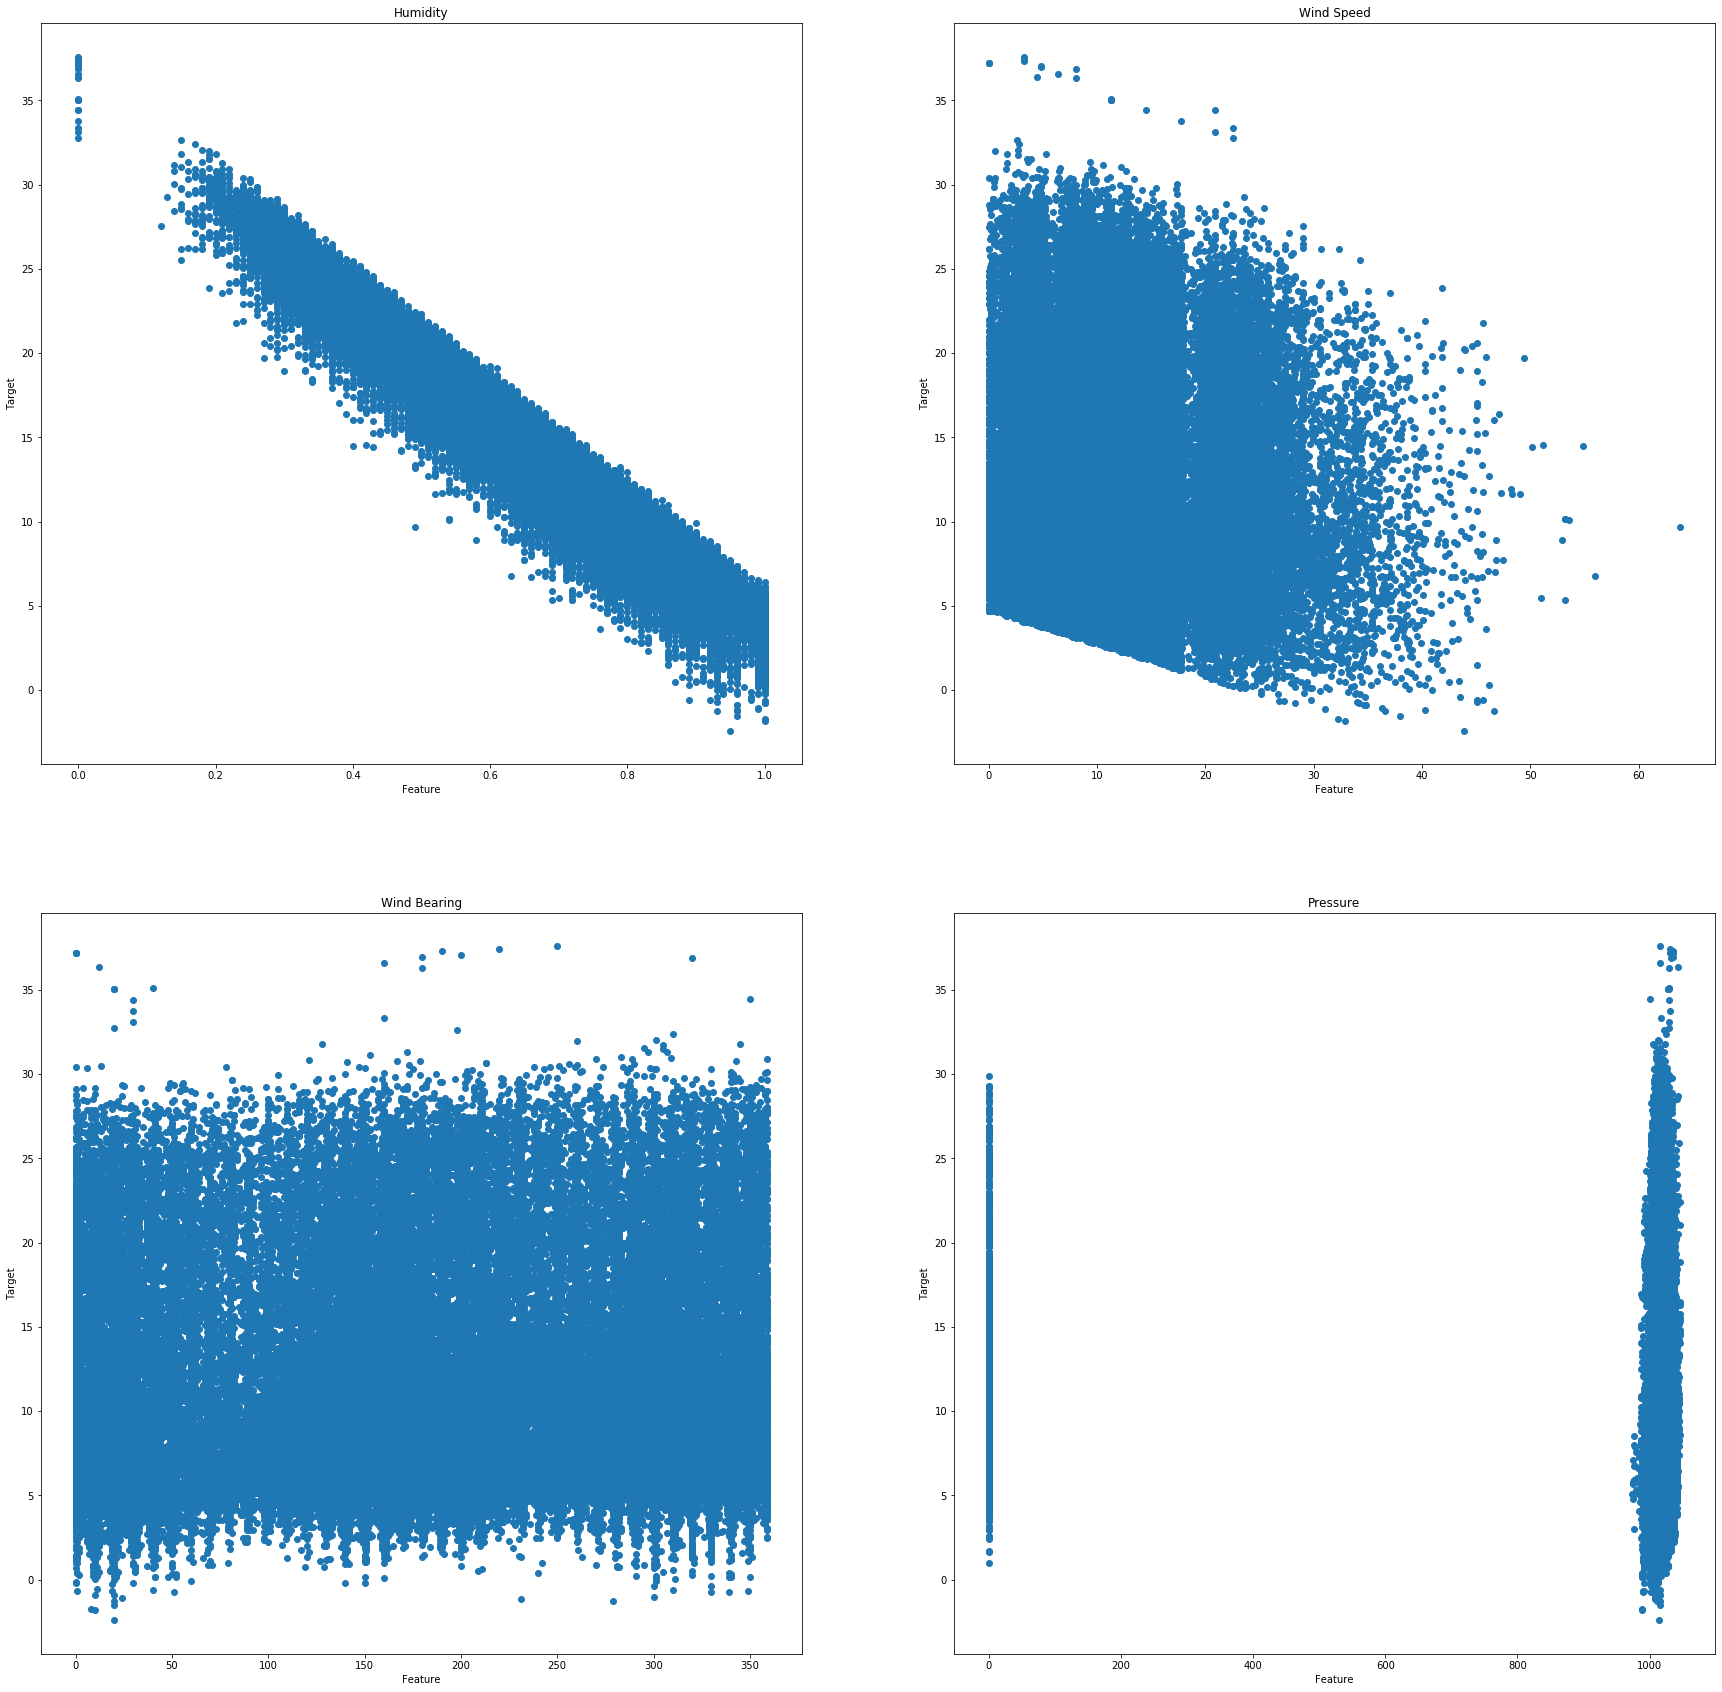

In [3]:
# we fit a linear regression where target is Y
# and features are humidity, windspeed, windbearing, and pressure
lrm_example = linear_model.LinearRegression()
lrm_example.fit(weather_df[['humidity','windspeed','windbearing','pressure']],weather_df['temperature'])

# predictions of the linear regression
predictions = lrm_example.predict(weather_df[['humidity','windspeed','windbearing','pressure']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

plt.figure(figsize = (30,30))

# we plot the estimated Y and X
# the relationship should be quadratic
plt.subplot(2,2,1)
plt.scatter(weather_df[['humidity']], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('Humidity')

plt.subplot(2,2,2)
plt.scatter(weather_df[['windspeed']], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('Wind Speed')

plt.subplot(2,2,3)
plt.scatter(weather_df[['windbearing']], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('Wind Bearing')

plt.subplot(2,2,4)
plt.scatter(weather_df[['pressure']], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('Pressure')

plt.show()



#### Assumption TWO: the error term should be zero on average

In [4]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: -4.714704061941714e-16


#### Assumption THREE: homoscedasticity

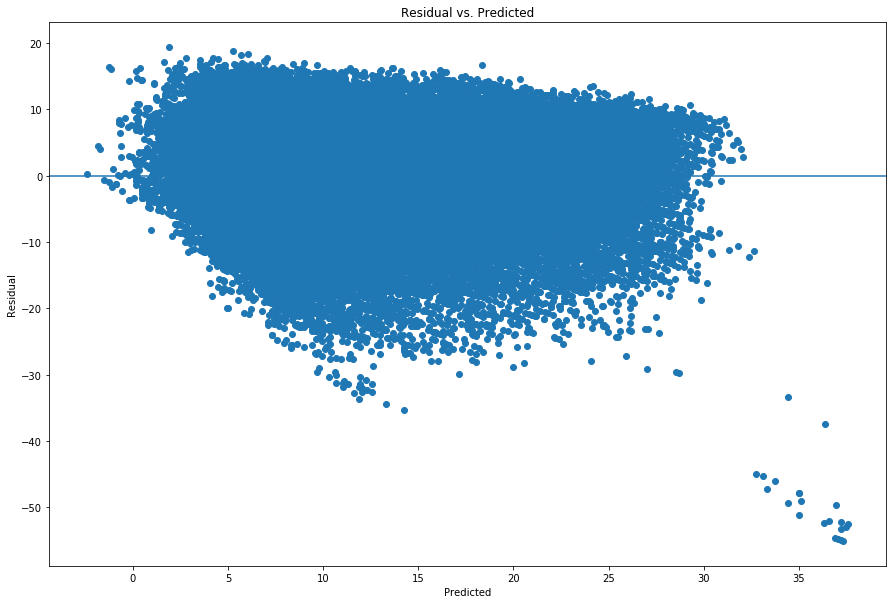

In [5]:
plt.figure(figsize = (15,10))
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [6]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


#### Assumption FOUR: low multicollinearity

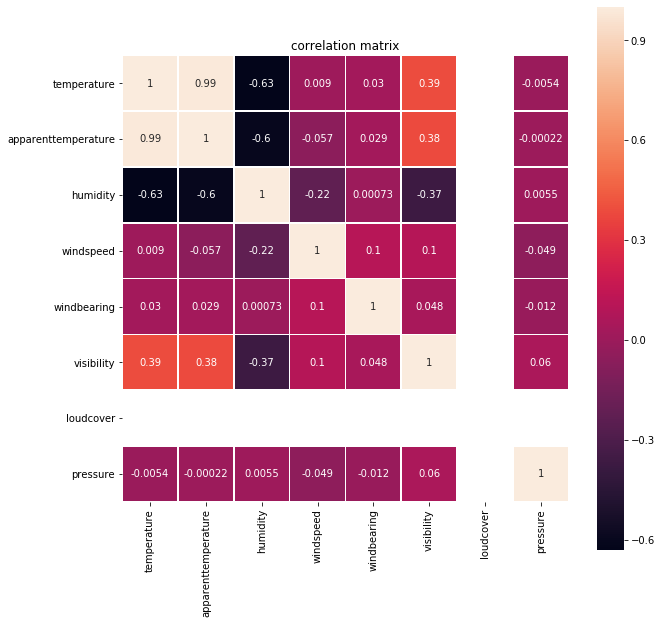

In [7]:
import seaborn as sns

# make the correlation matrices.
weather_cmat = weather_df.corr()

plt.figure(figsize=(10,10))

# draw the heatmap using seaborn.
sns.heatmap(weather_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

note to self: if blank it means there's NAN

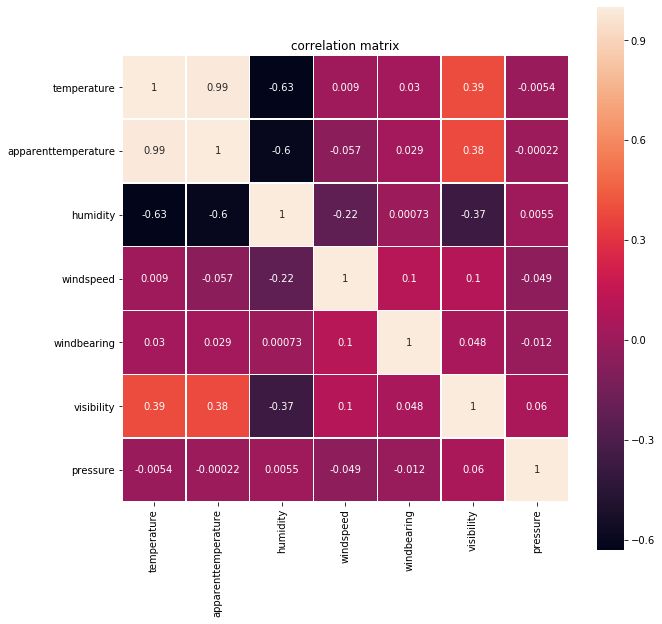

In [8]:
weather_df_clean=weather_df.drop(columns=['loudcover'])

weather_cmat_clean = weather_df_clean.corr()

plt.figure(figsize=(10,10))
sns.heatmap(weather_cmat_clean, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

#### Assumption FIVE: error terms should be uncorrelated with one another

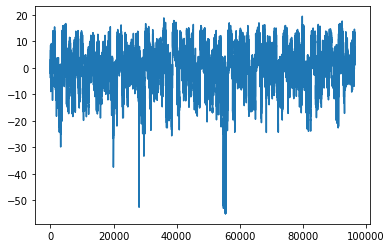

In [9]:
plt.plot(errors)
plt.show()

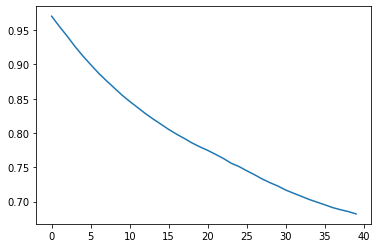

In [10]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

#### Assumption SIX: features shouldn't be correlated with the errors

In [11]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252357 and p value is 0.0
Normality test statistics is 3375.4323076995743 and p value is 0.0


#### SUMMARY
This data set is not a good candidate for Linear Regression.